# Bibliotekos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Duomenų importavimas / tvarkymas

In [ ]:
pardavimai = pd.read_excel('video_game_sales.xlsx') # duomenys (datų ir kitos informacijos nebuvimas prie kai kurių eilučių) buvo sutvarkyti excelyje
pardavimai

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16595,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16596,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16597,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
pardavimai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


# Klausimas nr. 1 Kiek buvo išleista skirtingų žaidimų kiekvienais metais?

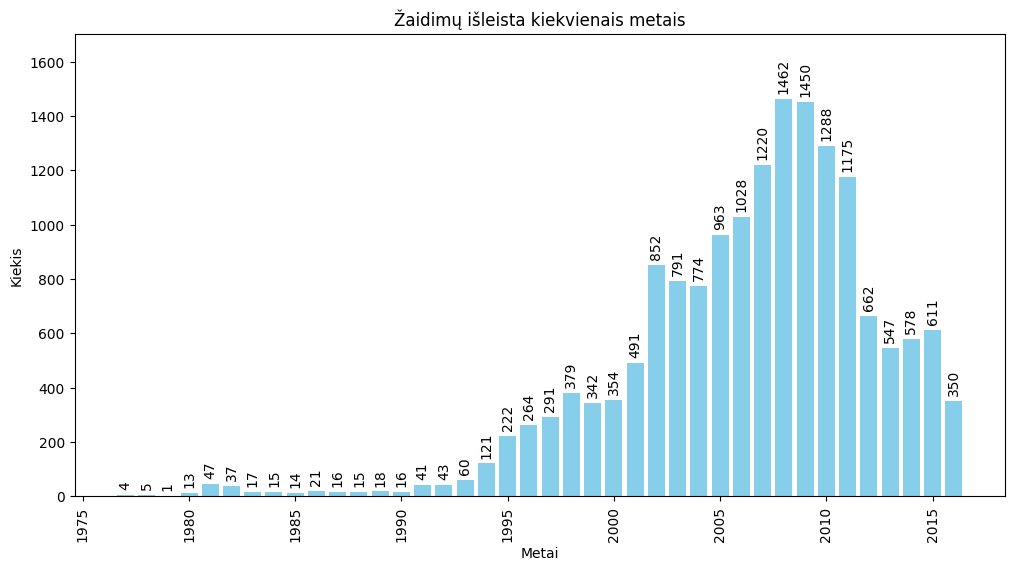

In [ ]:
metai = pardavimai['Year'].value_counts(sort=False)
metai
plt.figure(figsize=(12, 6))
stulpeliai = plt.bar(metai.index, metai.values)
plt.title('Žaidimų išleista kiekvienais metais')
plt.xlabel('Metai')
plt.ylabel('Kiekis')
for bar in stulpeliai:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20,
             f'{height}', ha='center', va='bottom', rotation=90)
plt.xticks(rotation=90)
plt.ylim(0, 1700)
stulpeliai = plt.bar(metai.index, metai.values, color='skyblue')
plt.show()

# Klausimas nr. 2 Kokia buvo kompiuterinių žaidimų pardavimų dinamika Šiaurės Amerikoje, Europoje ir Japonijoje?

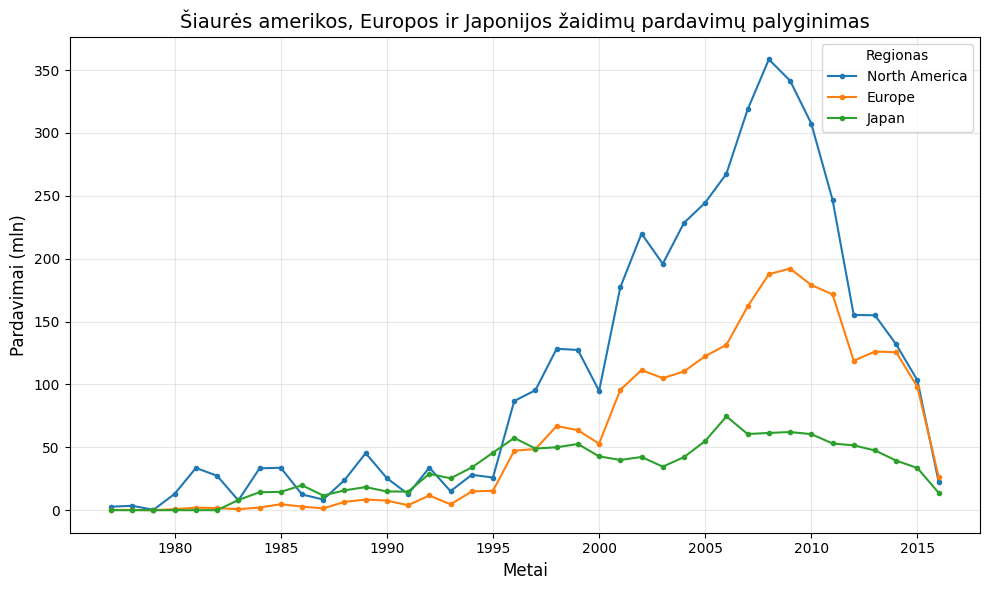

In [ ]:
pard_per_metus = pardavimai.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
plt.figure(figsize=(10, 6))
plt.plot(pard_per_metus.index, pard_per_metus['NA_Sales'], label='North America', marker='.')
plt.plot(pard_per_metus.index, pard_per_metus['EU_Sales'], label='Europe', marker='.')
plt.plot(pard_per_metus.index, pard_per_metus['JP_Sales'], label='Japan', marker='.')
plt.title('Šiaurės amerikos, Europos ir Japonijos žaidimų pardavimų palyginimas', fontsize=14)
plt.xlabel('Metai', fontsize=12)
plt.ylabel('Pardavimai (mln)', fontsize=12)
plt.legend(title="Regionas")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Klausimas nr. 3 Kokia buvo populiariausia žaidimų platforma kiekvienais metais remiantis žaidimų pardavimais?

In [ ]:
platforma1 = pardavimai.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
populiariausia_platforma = platforma1.loc[platforma1.groupby('Year')['Global_Sales'].idxmax()]
platforma = populiariausia_platforma.sort_values('Year')
platforma

,Year,Platform,Global_Sales
0,1977,Atari 2600,2.96
1,1978,Atari 2600,3.77
2,1979,Atari 2600,0.31
3,1980,Atari 2600,13.96
4,1981,Atari 2600,35.98
5,1982,Atari 2600,29.33
7,1983,NES,10.96
10,1984,NES,50.09
13,1985,NES,53.44
16,1986,NES,36.41


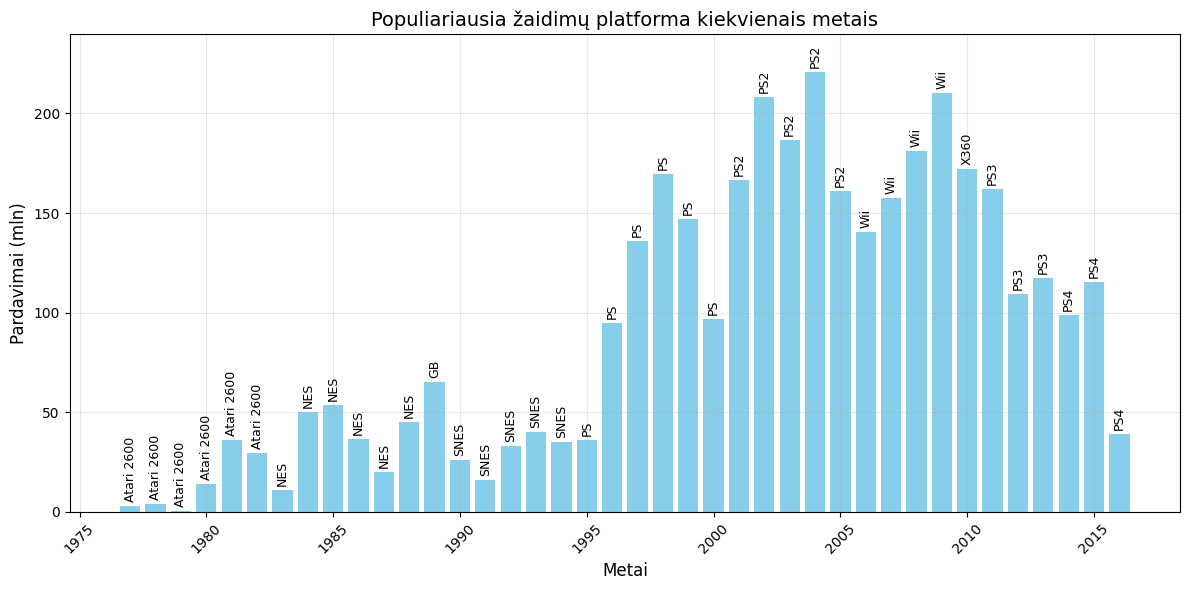

In [ ]:
plt.figure(figsize=(12, 6))
bar = plt.bar(platforma['Year'], platforma['Global_Sales'], color='skyblue')
for bar, platform in zip(bar, platforma['Platform']):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             platform,
             ha='center', va='bottom', fontsize=9, rotation=90)
plt.title('Populiariausia žaidimų platforma kiekvienais metais', fontsize=14)
plt.xlabel('Metai', fontsize=12)
plt.ylabel('Pardavimai (mln)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.ylim(0, 240)
plt.grid(alpha=0.3)
plt.show()

# Klausimas nr. 4 Kokie yra top 10 žaidimai 2000-2010 laikotarpyje pagal pardavimus?

In [ ]:
zaidimai = pardavimai[(pardavimai['Year'] >= 2000) & (pardavimai['Year'] <= 2010)]
top_zaidimai = zaidimai.sort_values(by='Global_Sales', ascending=False)
top10 = top_zaidimai.head(10)
top10.reset_index(drop=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
5,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
6,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
7,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
8,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


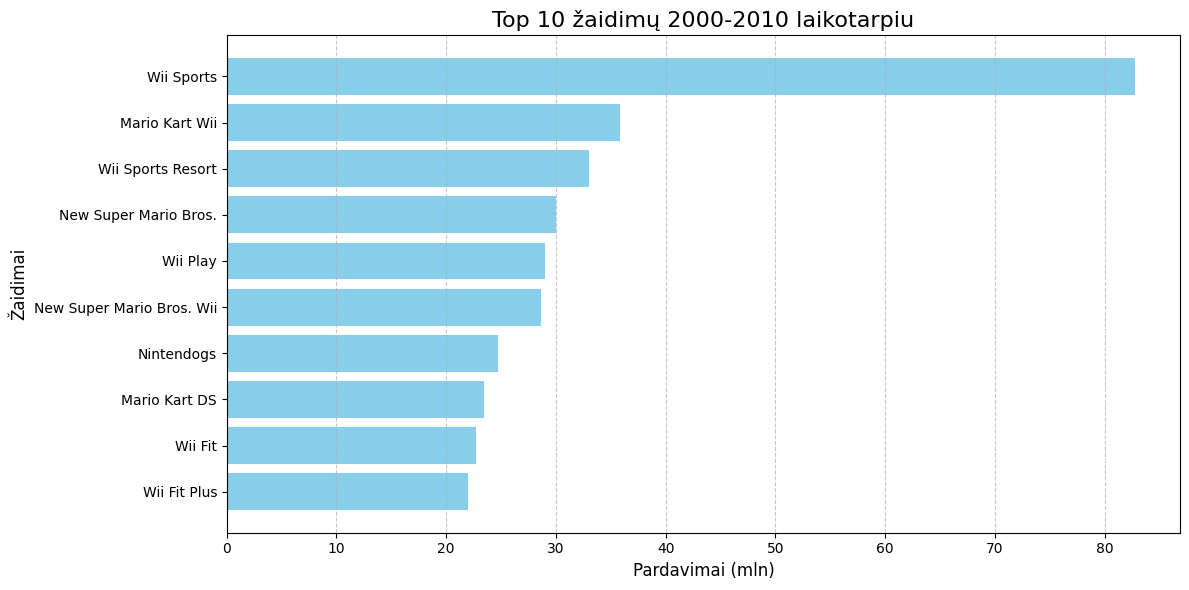

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top10['Name'], top10['Global_Sales'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 žaidimų 2000-2010 laikotarpiu', fontsize=16)
plt.xlabel('Pardavimai (mln)', fontsize=12)
plt.ylabel('Žaidimai', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Klausimas nr. 5 Kokie buvo populiariausi 1990-1999 laikotarpio žaidimų stiliai?

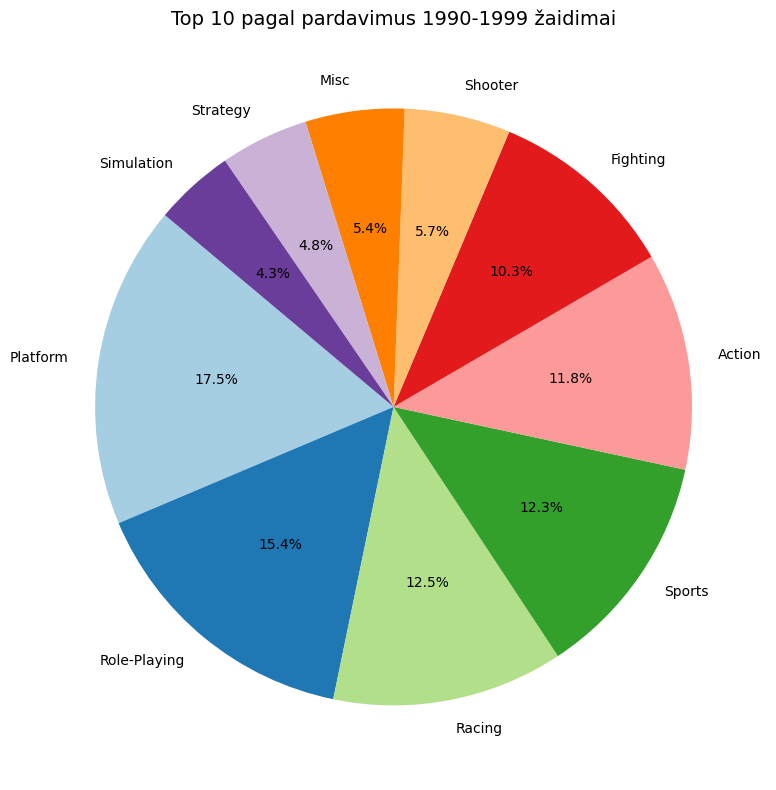

In [ ]:
zaidimai90s = pardavimai[(pardavimai['Year'] >= 1990) & (pardavimai['Year'] <= 1999)]
st = zaidimai90s.groupby('Genre')['Global_Sales'].sum()
topzaidimai90 = st.nlargest(10)
plt.figure(figsize=(8, 8))
topzaidimai90.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 pagal pardavimus 1990-1999 žaidimai', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Popiliariausios platformos pagal pardavimus.

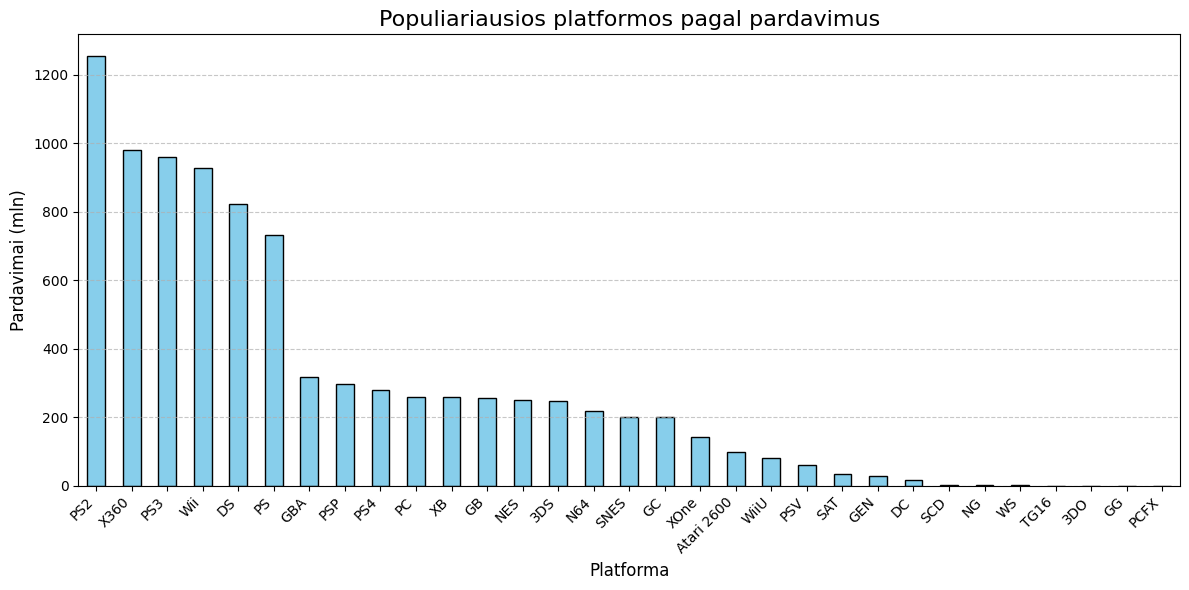

In [ ]:
platforma_pard = pardavimai.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
platforma_pard.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Populiariausios platformos pagal pardavimus', fontsize=16)
plt.xlabel('Platforma', fontsize=12)
plt.ylabel('Pardavimai (mln)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Call of Duty žaidimų išleidimo informacija

In [ ]:
callofduty = pardavimai[pardavimai['Name'].str.contains('Call of Duty', case=False, na=False)]
callofduty

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...,...
7949,7950,Call of Duty: World at War,PC,2008,Shooter,Activision,0.02,0.13,0.00,0.03,0.19
12408,12409,Call of Duty 2,PC,2005,Shooter,Activision,0.00,0.05,0.00,0.01,0.06
12639,12640,Call of Duty: The War Collection,X360,2010,Shooter,Activision,0.05,0.00,0.00,0.00,0.06
15598,15599,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,Activision,0.00,0.01,0.00,0.00,0.02


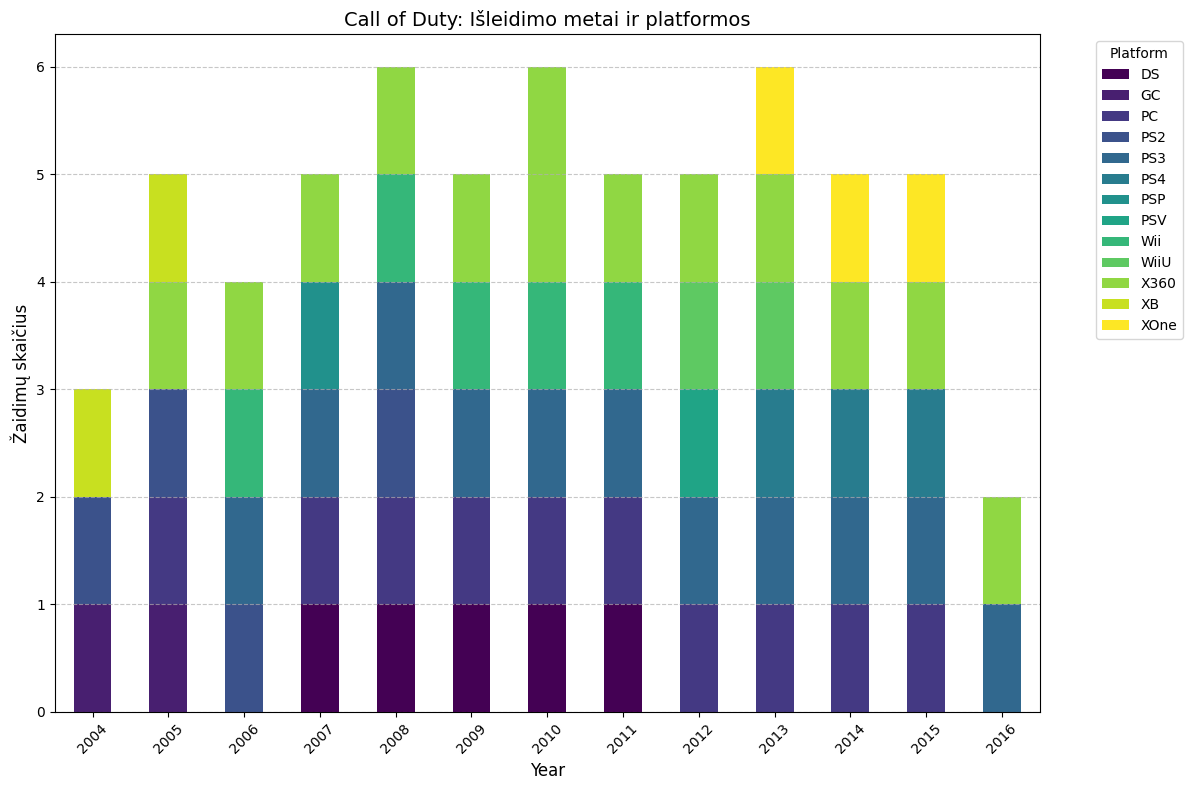

In [ ]:
cod = callofduty.groupby(['Year', 'Platform']).size().unstack(fill_value=0)
cod.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Call of Duty: Išleidimo metai ir platformos', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Žaidimų skaičius', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Išleistų žaidimų grupavimas pagal dešimtmečius.

In [ ]:
pardavimai['Desimtmetis'] = pardavimai['Year'].apply(
    lambda x: "1970-80-ieji" if x in range(1970, 1990) else
              f"{(x // 10) * 10}-ieji" if pd.notna(x) else "N/A"
)
pardavimai[['Name', 'Year', 'Desimtmetis']].head()
pardavimai

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Desimtmetis
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-ieji
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1970-80-ieji
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-ieji
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-ieji
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-ieji
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2000-ieji
16594,16595,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2000-ieji
16595,16596,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2000-ieji
16596,16597,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2010-ieji


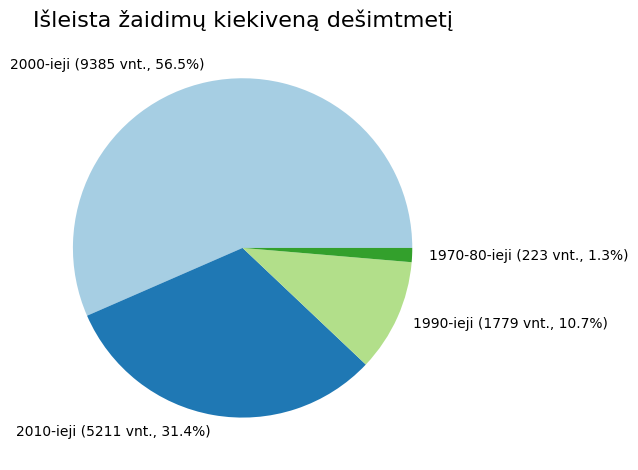

In [ ]:
sk_desimt = pardavimai['Desimtmetis'].value_counts()
spalvos = plt.cm.Paired.colors
info = [
    f"{decade} ({count} vnt., {percent:.1f}%)"
    for decade, count, percent in zip(
        sk_desimt.index,
        sk_desimt.values,
        (sk_desimt / sk_desimt.sum() * 100)
    )
]
plt.pie(
    sk_desimt,
    labels=info,
    colors=spalvos
)
plt.title("Išleista žaidimų kiekiveną dešimtmetį", fontsize=16, loc='center')
plt.tight_layout()
plt.show()

# Populiariausi žaidimų stiliai pagal pardavimus ir jų palyginimas.

In [ ]:
stiliai = pardavimai.groupby('Genre').agg(
    Zaidimai=('Name', 'count'),
    Viso_global_sales=('Global_Sales', 'sum')
)
stiliai = stiliai.sort_values(by='Viso_global_sales', ascending=False)
print(stiliai)

              Zaidimai  Viso_global_sales
Genre                                    
Action            3315            1750.97
Sports            2348            1330.99
Shooter           1310            1037.37
Role-Playing      1488             927.37
Platform           887             831.39
Misc              1752             810.95
Racing            1250             732.16
Fighting           851             449.05
Simulation         867             392.20
Puzzle             583             244.96
Adventure         1264             237.91
Strategy           683             175.14


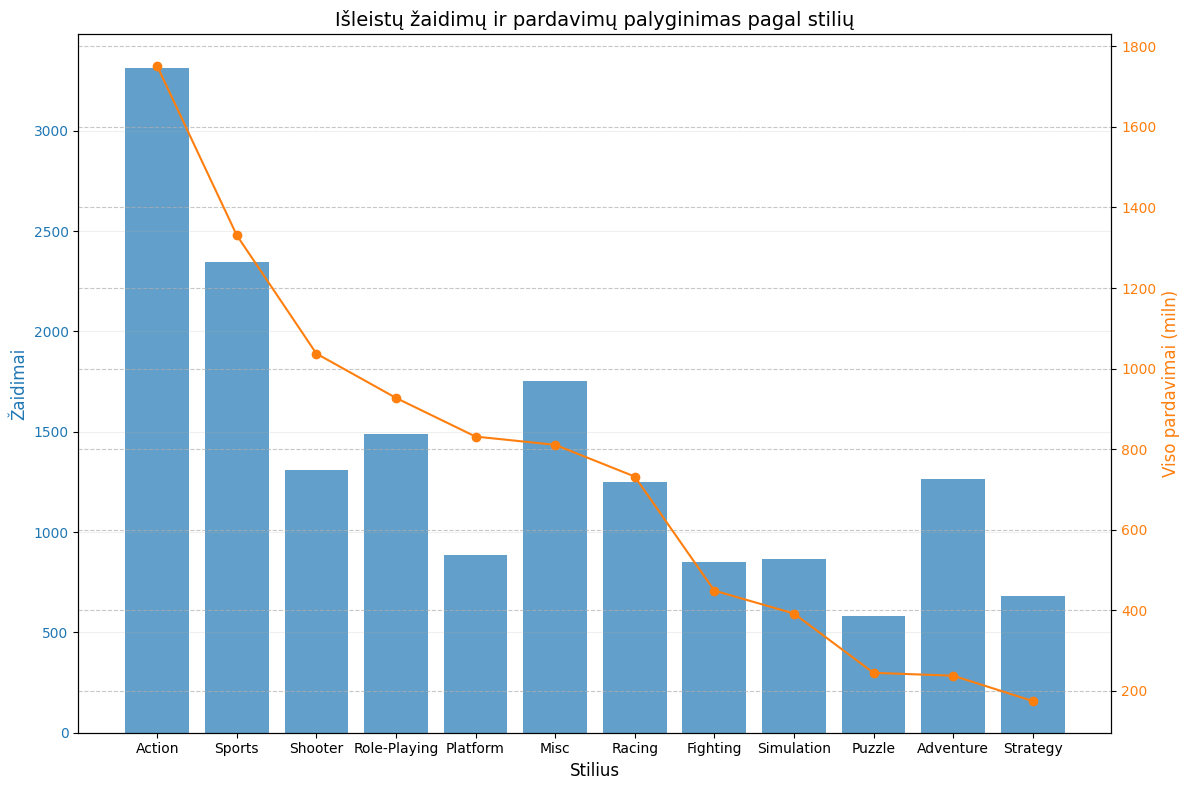

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
s1 = 'tab:blue'
ax1.bar(stiliai.index, stiliai['Zaidimai'], color=s1, label='Žaidimai', alpha=0.7)
ax1.set_xlabel('Stilius', fontsize=12)
ax1.set_ylabel('Žaidimai', color=s1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=s1)
plt.grid(axis='y', linestyle='-', alpha=0.2)
ax2 = ax1.twinx()
s2 = 'tab:orange'
ax2.plot(stiliai.index, stiliai['Viso_global_sales'], color=s2, marker='o', label='Viso pardavimai')
ax2.set_ylabel('Viso pardavimai (miln)', color=s2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=s2)
plt.title('Išleistų žaidimų ir pardavimų palyginimas pagal stilių', fontsize=14)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Amerika vs. likęs pasaulis palyginimas

In [ ]:
# pardavimų palyginimas Šiaurės amerika vs. kitos šalys
pardavimai['Kiti_regionai'] = pardavimai[['EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
palyginimas = pardavimai[['NA_Sales', 'Kiti_regionai']].sum()
palyginimas

,0
NA_Sales,4395.02
Kiti_regionai,4522.16


In [ ]:
NA_stilius = pardavimai.groupby('Genre')['NA_Sales'].sum().idxmax()
NA_stilius_pardavimai = pardavimai.groupby('Genre')['NA_Sales'].sum().max()

NA_leidejas = pardavimai.groupby('Publisher')['NA_Sales'].sum().idxmax()
NA_leidejas_pardavimai = pardavimai.groupby('Publisher')['NA_Sales'].sum().max()

NA_platforma = pardavimai.groupby('Platform')['NA_Sales'].sum().idxmax()
NA_platforma_pardavimai = pardavimai.groupby('Platform')['NA_Sales'].sum().max()

Pasaulis_stilius = pardavimai.groupby('Genre')['Kiti_regionai'].sum().idxmax()
Pasaulis_stilius_pardavimai = pardavimai.groupby('Genre')['Kiti_regionai'].sum().max()

Pasaulis_leidejas = pardavimai.groupby('Publisher')['Kiti_regionai'].sum().idxmax()
Pasaulis_leidejas_pardavimai = pardavimai.groupby('Publisher')['Kiti_regionai'].sum().max()

Pasaulis_platforma = pardavimai.groupby('Platform')['Kiti_regionai'].sum().idxmax()
Pasaulis_platforma_pardavimai = pardavimai.groupby('Platform')['Kiti_regionai'].sum().max()

print("Populiariausia Šiaurės Amerikoje:")
print(f"Žanras: {NA_stilius} su {NA_stilius_pardavimai:.2f} mln. pardavimų")
print(f"Leidėjas: {NA_leidejas} su {NA_leidejas_pardavimai:.2f} mln. pardavimų")
print(f"Platforma: {NA_platforma} su {NA_platforma_pardavimai:.2f} mln. pardavimų")

print("\nPopuliariausia kitose šalyse:")
print(f"Žanras: {Pasaulis_stilius} su {Pasaulis_stilius_pardavimai:.2f} mln. pardavimų")
print(f"Leidėjas: {Pasaulis_leidejas} su {Pasaulis_leidejas_pardavimai:.2f} mln. pardavimų")
print(f"Platforma: {Pasaulis_platforma} su {Pasaulis_platforma_pardavimai:.2f} mln. pardavimų")

Populiariausia Šiaurės Amerikoje:
Žanras: Action su 877.76 mln. pardavimų
Leidėjas: Nintendo su 818.87 mln. pardavimų
Platforma: X360 su 601.05 mln. pardavimų

Populiariausia kitose šalyse:
Žanras: Action su 872.20 mln. pardavimų
Leidėjas: Nintendo su 969.69 mln. pardavimų
Platforma: PS2 su 671.92 mln. pardavimų


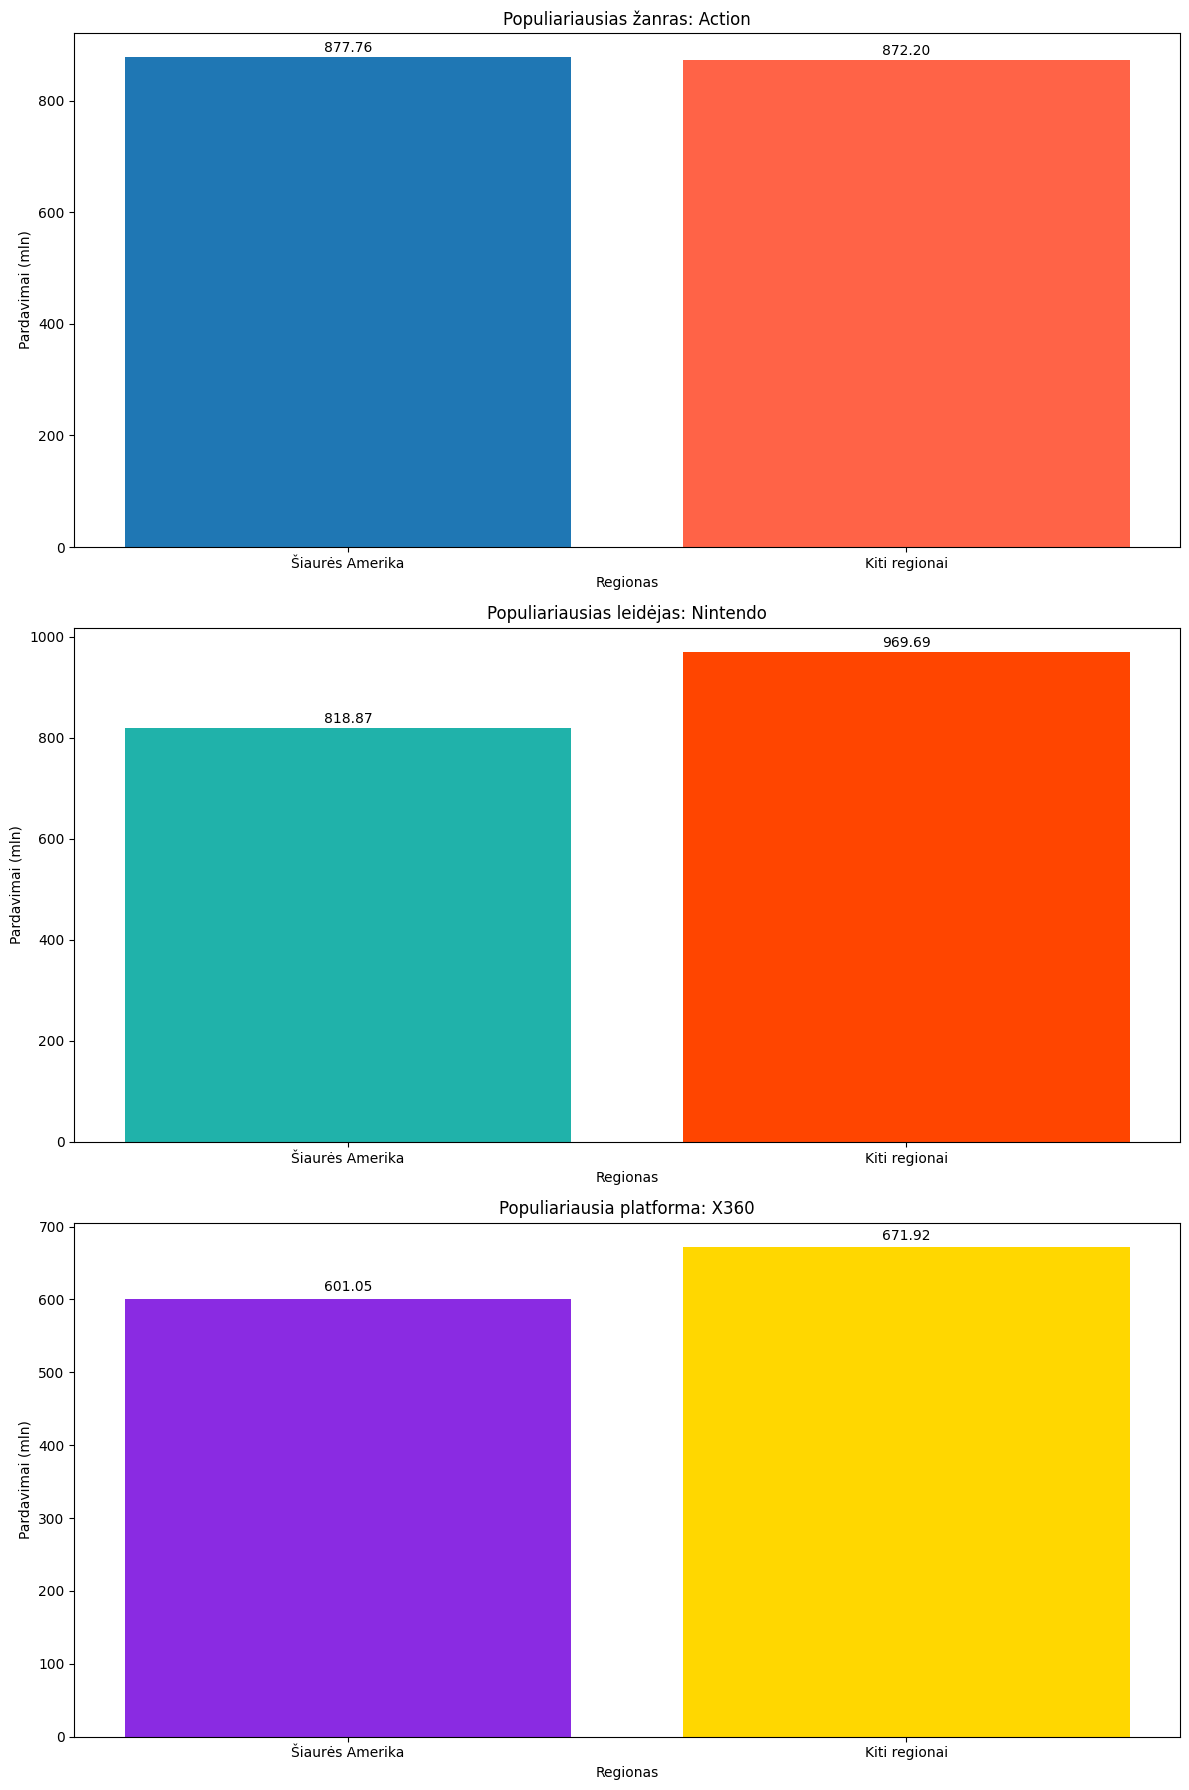

In [ ]:

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

axs[0].bar(['Šiaurės Amerika', 'Kiti regionai'], [NA_stilius_pardavimai, Pasaulis_stilius_pardavimai],
           color=['#1f77b4', '#ff6347'])
axs[0].set_title(f'Populiariausias žanras: {NA_stilius}')
axs[0].set_xlabel('Regionas')
axs[0].set_ylabel('Pardavimai (mln)')
for i, v in enumerate([NA_stilius_pardavimai, Pasaulis_stilius_pardavimai]):
    axs[0].text(i, v + 10, f'{v:.2f}', ha='center', color='black')

axs[1].bar(['Šiaurės Amerika', 'Kiti regionai'], [NA_leidejas_pardavimai, Pasaulis_leidejas_pardavimai],
           color=['#20b2aa', '#ff4500'])
axs[1].set_title(f'Populiariausias leidėjas: {NA_leidejas}')
axs[1].set_xlabel('Regionas')
axs[1].set_ylabel('Pardavimai (mln)')
for i, v in enumerate([NA_leidejas_pardavimai, Pasaulis_leidejas_pardavimai]):
    axs[1].text(i, v + 10, f'{v:.2f}', ha='center', color='black')

axs[2].bar(['Šiaurės Amerika', 'Kiti regionai'], [NA_platforma_pardavimai, Pasaulis_platforma_pardavimai],
           color=['#8a2be2', '#ffd700'])
axs[2].set_title(f'Populiariausia platforma: {NA_platforma}')
axs[2].set_xlabel('Regionas')
axs[2].set_ylabel('Pardavimai (mln)')
for i, v in enumerate([NA_platforma_pardavimai, Pasaulis_platforma_pardavimai]):
    axs[2].text(i, v + 10, f'{v:.2f}', ha='center', color='black')

plt.tight_layout()
plt.show()